## MODEL SOLUTION
## Numerical Ordinary Differential Equations and Applications
### Computer Assignment CA: AY2024-25

H. Yorston, J. Spence and D. J. Higham 
School of Mathematics, University of Edinburgh, 2025


### Task 1a
We will consider the differential system
\begin{equation}
\dfrac{dy}{dx} = \lambda(-y +sinx)
\end{equation}
where $y(0) =0$ .

Note: You need to be careful with using $lambda$ in Python as it has a special meaning. Many programmers use the spelling <i> lamda </i>. <br>


The solution to this equation is
\begin{equation}
y(x) = Ce^{-\lambda x}+\frac{\lambda}{1+\lambda^2}(\lambda \sin x - \cos x)\;,
\end{equation}
where $C= \dfrac{\lambda}{1+\lambda^2}$ for the initial condition $y(0) = 0$.

We will use a function to solve this equation numerically using the Euler Forward method by defining an <i> euler_forward</i> method, which will take the arguments of $X$ an array of values of $x$, $f$ the function which will be the stiff differential equation given above for $\dfrac{dy}{dx}$ and the initial condition $y_0$.


In [1]:
# Import the required modules
import numpy as np                # scientific library
import matplotlib.pyplot as plt   # for creating plots
from scipy.integrate import solve_ivp
%matplotlib inline

In [2]:
def euler_forward(X, f, y0, lamda):

    # find out how many different times required
    x_array = X.size
    # an array of zeros for storing the Y values for any number of eqns
    # at each required time point
    Y = np.zeros(x_array)

    Y[0] = y0  # the first values in the zero index of Y is set to y0

    for i in range(0, x_array - 1):  # i loops from 0 to N - 2
        delta_x = X[i + 1] - X[i]  # find the size of the time step  delta_x
        Y[i + 1] = delta_x * f(X[i], Y[i], lamda) + Y[i]  # Euler's Method

    return Y

Write a function called <i>stiff_eqn</i> which calculates $\dfrac{dy}{dx}$ from the stiff differential equation defined above with arguments of $x$ the value of  $x$, $y$ the value of $y$ at a specific point and $\lambda$.

[1 mark]

In [3]:
def stiff_eqn(x, y, lamda):

    # Define the stiff differential equation dy/dx = lambda(-y + sin(x)).
    dy_dx = lamda * (-y + np.sin(x))

    return dy_dx

Write a function to calculate the exact solution using $y(x)$ given above and which takes the arguments $X$, an array of $x$ values, and $\lambda$ and returns an array $Y$ of $y$ values corresponding to the solution $y(x)$ for each value $x$ in $X$.

[1 mark]

In [4]:
def solution(X, lamda):

    # Compute the exact solution of the differential equation
    C = lamda / (1 + lamda**2)
    Y_exact = C * np.exp(-lamda * X) + C * (lamda * np.sin(X) - np.cos(X))

    return Y_exact

Now test out your implementation of Euler's Forward Method with $\lambda = 10.0$ and plot this together with the exact solution for comparison on a range of $x \in [0,2\pi]$ and $41$ points. 

[2 marks]

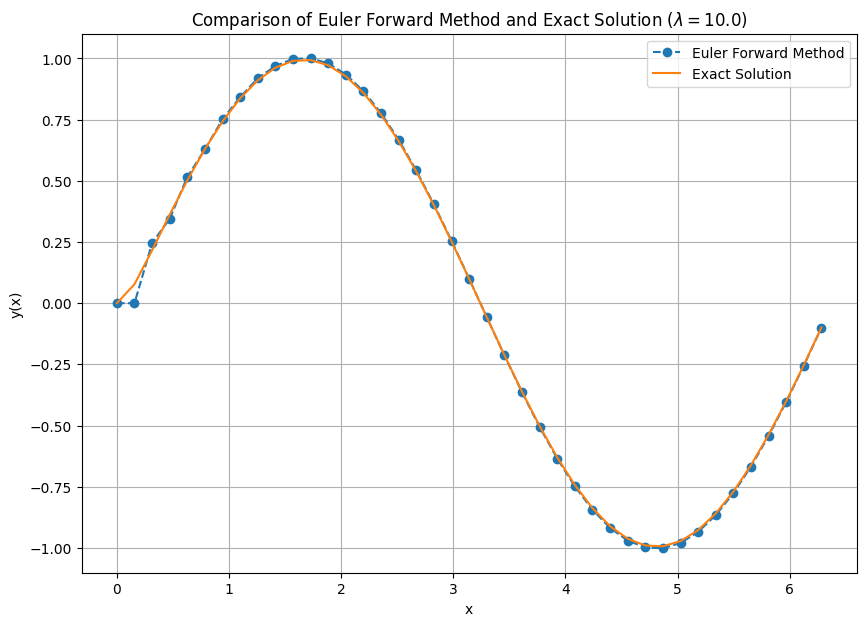

In [5]:
# your code
y0 = 0.0  # the initial array of values of y
x0 = 0.0  # the initial value of x
xf = 2.0 * np.pi  # the final value of x
lamda = 10.0

N = 41
y_array = np.zeros(N)
X = np.linspace(x0, xf, N)  # a list to hold N values of x

# your code here
y_exact = solution(X, lamda)  # Solve the exact solution
y_array = euler_forward(X, stiff_eqn, y0, lamda)  # Solve using Euler Forward method

# Plot the results
plt.figure(figsize=(10, 7))
plt.plot(X, y_array, label="Euler Forward Method", linestyle="--", marker="o")
plt.plot(X, y_exact, label="Exact Solution")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title(
    f"Comparison of Euler Forward Method and Exact Solution ($\lambda = {lamda}$)"
)
plt.legend()
plt.grid(True)
plt.show()

### Task 1b
In real situations the value of $\lambda$ is often very large. Test your previous implementation of Euler's Forward method with $\lambda= 10000.0$ starting with $41$ points then $401$ points followed by $4001$ points and then $40001$ points. (Do not put these values in a loop and there is no need to store your answers). You should have found that there is no stable solution until you tried $40001$ points.<br>
In order to achieve a stable solution within a much smaller number of points, we need to use implicit methods. The backward Euler method is an example of these and is given below.<br>
\begin{align}
x_{k+1} &= x_k + h\\
y_{k+1} &= y_k + hf(x_{k+1},y_{k+1})\;.
\end{align}
<br>
It is possible to solve this for this special case of the specific <i>stiff_eqn </i>giving
\begin{align}
x_{k+1} &= x_k + h\\
y_{k+1} &= y_k + h\lambda (-y_{k+1} + sin x_{k+1})\;.
\end{align}
<br>
The second equation can be rearranged to
\begin{align}
y_{k+1} &= \dfrac{(y_k + h\lambda\sin x_{k+1})}{(1+h\lambda)}\;.
\end{align}

Write a function <i>euler_backward </i> that implements the Euler Backward method for this specific equation only.<br>
Note: it will not be necessary to carry the function as an argument and the only arguments necessary are an array of values of $X$ and the initial condition $y0$.

[2 marks]

In [6]:
def euler_backward(X, y0, lamda):

    x_array = X.size  # Number of points
    Y = np.zeros(x_array)  # Array to store y values
    Y[0] = y0  # Initial condition

    for i in range(0, x_array - 1):  # i loops from 0 to N - 2
        h = X[i + 1] - X[i]  # find the size of the time step h

        # Backward Euler formula
        Y[i + 1] = (Y[i] + h * lamda * np.sin(X[i + 1])) / (1 + lamda * h)

    return Y

Test out the <i>euler_backward </i> function with $\lambda = 10000.0$ and $41$ points. Plot the solution obtained by the Euler Backward method against the exact solution.

[1 mark]

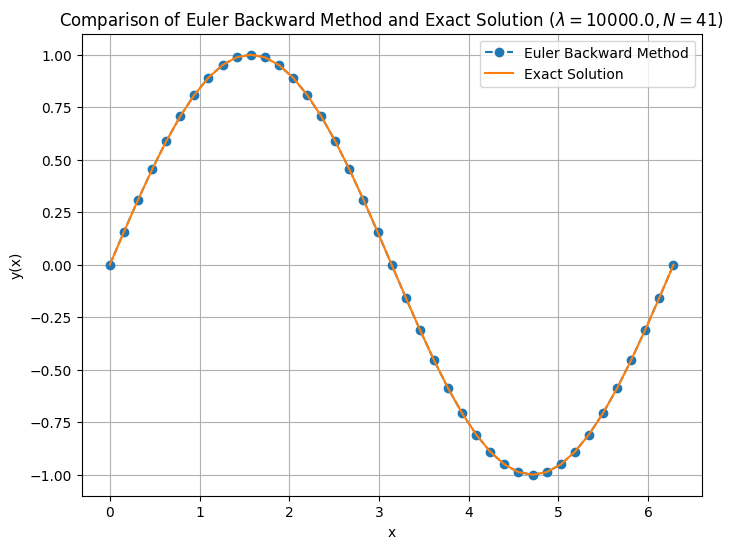

In [7]:
# your code
y0 = 0.0  # initial array of values of y
x0 = 0.0  # initial value of independent variable
xf = 2.0 * np.pi  # final value of independent variable

lamda = 10000.0


N = 41
X = np.linspace(x0, xf, N)  # a list to hold N values of X
# your code here
# Plot the results
y_array = euler_backward(X, y0, lamda)
y_exact = solution(X, lamda)

plt.figure(figsize=(8, 6))
plt.plot(X, y_array, label="Euler Backward Method", linestyle="--", marker="o")
plt.plot(X, y_exact, label="Exact Solution")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title(
    f"Comparison of Euler Backward Method and Exact Solution ($\lambda = {lamda}, N = {N}$)"
)
plt.legend()
plt.grid(True)
plt.show()

### Task 1c
We will examine the mean absolute error per number of points for both the forward and backward Euler methods. To enable a sensible comparison we will use a value of $\lambda = 100.0$ and numbers of points  $41,81,161,321,641,1281$ and $2561$. 
<br>(i) Produce a table of the errors of each method for each number of points. <br>
The error can be estimated from $\sum_{x\in X}\textit{abs}(y(x)- y_{sol}(x))\div$ <i>number of points</i> where $y_{sol}$ is the value given by the exact solution.<br>
(ii) Give an rough estimate of the integer $p$ in the error estimate $Ch^p$ from your values of the errors in the backward Euler method. <br>
(iii) Comment the results in your table.

[3 marks]

In [8]:
y0 = 0.0  # initial array of values of y
x0 = 0.0  # initial value of independent variable
xf = 2.0 * np.pi  # final value of independent variable

lamda = 100.0

i = 0
no_of_points = [41, 81, 161, 321, 641, 1281, 2561]
pts = len(no_of_points)
error_back = np.zeros(pts)
error_forw = np.zeros(pts)
for N in no_of_points:
    # take each N in turn from the no_of-points list
    X = np.linspace(x0, xf, N)  # a list to hold N values of indep. var.

    # your code here
    y_exact = solution(X, lamda)

    # Forward Euler solution
    y_array_f = euler_forward(X, stiff_eqn, y0, lamda)
    error_forw[i] = np.mean(np.abs(y_array_f - y_exact))

    # Backward Euler solution
    y_array_b = euler_backward(X, y0, lamda)
    error_back[i] = np.mean(np.abs(y_array_b - y_exact))

    i = i + 1

from pandas import DataFrame  # use the pandas library and the Dataframe sublibrary

# create the data array for the plot
data = np.array([no_of_points, error_back, error_forw])
# print out the dataframe(table) with columns headed"h" and "max global error"
DataFrame(data.T, columns=["N", "Backw. Eul. error", "Forw. Eul. error"])

,N,Backw. Eul. error,Forw. Eul. error
0,41.0,0.000498,1.314461e+43
1,81.0,0.000261,1.084657e+63
2,161.0,0.000138,4.000819e+70
3,321.0,0.000073,8.554835e-04
4,641.0,0.000038,4.021337e-05
5,1281.0,0.000019,1.980861e-05
6,2561.0,0.000010,9.827618e-06


Comment:

#### ii:
By roughly calculate the decreasing rate for Backward Euler method, the approximate value of $p\approx 1$, indicating approximate first-order accuracy $(Ch^1)$.

#### iii:
- Forward Euler: Unstable for small $ N $, errors explode. Stabilizes only at very high value of $N$, but still less accurate than Backward Euler.
- Backward Euler: Compare with Forward Euler method, it have better stable and accurate for all $ N $, with errors decreasing consistently.
- Backward Euler is far better for offering reliability and efficiency.

## Task 2: Disease spread

### Background: modelling the spread of an infectious disease
Note: this task is based on material in the textbook *Programming for Computations-Python*, S. Linge and H. P. Langtangen, Springer Open, 2010.

The mathematical modelling of infectious diseases is an important and well-studied area that is currently of particular interest. A simple, but seminal, idea in this field is the Susceptible, Infectious, Recovered (SIR) compartmental model of Kermack and McKendrick [1]; see also (https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology). 
In this model, the population splits into three disjoint compartments. At time $t$, we denote the number of  *susceptible* individuals by $S(t)$. These people do not have the disease, but are vulnerable to infection.  We let $I(t)$ denote the number of individuals who have the disease at time $t$; this is the *infected* category. Finally, $R(t)$ denotes the number who have *recovered* from the disease, and are no longer infected nor susceptible (this category could also include deaths from the disease and individuals with immunity). SIR-type models assume that the society in which the disease spreads is homogeneous, finite and closed, i.e. all individuals are equally likely to become infected and recover, and there are no migrations to or from other societies. These models are relevant for diseases such as influenza (flu), measles, mumps and rubella.

Our SIR model is given by an ODE of the form 
\begin{align*}
\frac{dS}{dt} &=& - \beta  SI \\
\frac{dI}{dt} &=& \beta S  I - \gamma  I\\
\frac{dR}{dt} &=& \gamma I.
\end{align*}

In this model, $\beta$  and $\gamma$ are nonnegative parameters. 
To justify the model, we can argue that infection takes place when a susceptible individual intreracts with an infectious individual. Hence, the rate at which susceptible people become infected, $dS/dt$, is proportional to the current levels of both susceptible and infected people.
So $\beta$ quantifies the infectiousness of the disease, and 
$dS/dt = - \beta  SI$.
Similarly, the $\beta  SI$ expression affects $dI/dt$ positively, since a new infection event increases $I(t)$. 

We also assume that infected people recover at a rate determined by the constant $\gamma$.
So $dI/dt$ is affected negatively by $\gamma  I$ and 
$dR/dt$ is affected positively by $\gamma  I$.

[1] Kermack W.O., McKendrick A.G. 1927). "A Contribution to the Mathematical Theory of Epidemics". Proceedings of the Royal Society A. 115 (772): 700–721

#### Using solve_ivp 
These parts of the computer assignment require you to use the built-in ODE solver *solve_ivp*. In the code cell below there is a fully worked example.

The *solve_ivp* command is available within the *scipy.integrate* library of routines. Instructions can be found at https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html 

Although it is instructive to implement methods from scratch, as in the first Task, for larger-scale simulations it is advisable to use the built-in ODE solving software that is typically available in scientific computing packages. Hence a key objective of this assignment is to gain experience with *solve_ivp*. There is a range of numerical methods available within *solve_ivp*. We will start by just using the default method (an explicit Runge-Kutta method of order 5, with an accompanying Runge-Kutta method of 4 to help monitor the error). We will also use the default relative and absolute error tolerances.       

In [9]:
# Import the required modules
import numpy as np                # scientific library
import matplotlib.pyplot as plt   # for creating plots
%matplotlib inline
from scipy.integrate import solve_ivp # numerical solver of odes


## Application: Flu spreading around a submarine crew

We will apply the SIR ODE model above to study an outbreak of the flu in a submarine. This is a sensible application beacuse the model is relevant for a small closed society.
Note that **time will be measured in units of hours throughout this assignment.**

To choose the parameter values, suppose we have data from a similar vessel where the spread of the disease has already been monitored. In that other vessel, it was observed  that in
the beginning of a day there were 45 susceptibles and 5 infected, while the numbers
were 35 and 15, respectively, 24 hours later. Among 15 infected, it was observed that
5 recovered during a day. 

Based on the data that we have been given, it is reasonable to take 
$\beta=10/(45*5*24)$ and $\gamma=5/(15*24)$.

In the code below, we use these parameters in the case where there is 1 infected crew member initially and 49 susceptible crew members. We use the built-in ODE solver <i>solve_ivp</i> to simulate the system of equations numerically over a time interval of 720 hours. We plot the number of individuals in each category as a function of time.


In [10]:
# We first need to define a function that returns the RHS of the ODEs given time,
# variables and parameter values.


# define function of time, y and model parameters: t is not used until Task 5
def SIR_eqs(t, y, beta, gamma):
    S, I, R = y  # specify variables

    # create empty vector and then fill entries with the corresponding RHS
    dydt = np.empty(len(y))
    # Complete the equations below
    dydt[0] = -beta * S * I
    dydt[1] = beta * S * I - gamma * I
    dydt[2] = gamma * I
    return dydt  # the function will return the value of the ODE RHS

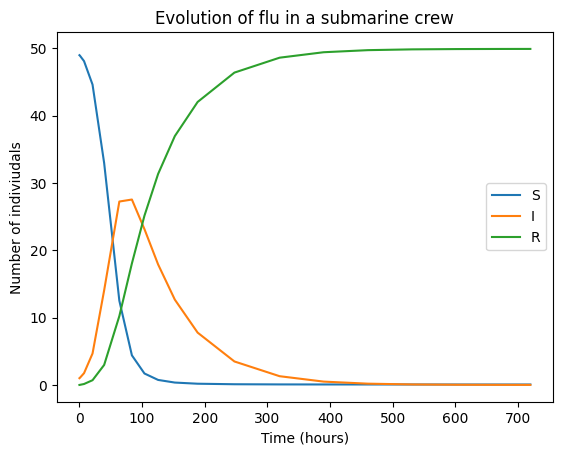

   Total infected  Max infected  Time of max infected
0              50            28             83.746839


In [11]:
## Evolution of flu in a submarine

# Create an array with the initial conditions
y0 = np.array([49, 1, 0])  # 49 susceptible, 1 infected, 0 recovered


# Use solve_ivp to simulate the ODE with the specified parameter
# values, initial conditions (y0), and simulate up to 720 hours.
# You need to pass the extra arguments for SIR_eqs using args = () within the call to solve_ivp
# Use the default solver method and accuracy tolerance.

sol = solve_ivp(
    SIR_eqs,
    [0, 720],
    y0,
    args=(10.0 / (45 * 5 * 24), 5.0 / (15 * 24)),
    dense_output=True,
)

# Plot solution
plt.figure(1)
plt.plot(sol.t, sol.y[0], label="S")
plt.plot(sol.t, sol.y[1], label="I")
plt.plot(sol.t, sol.y[2], label="R")
# Label axis
plt.xlabel("Time (hours)")
plt.ylabel("Number of indiviudals")
# Create a title and a legend
plt.title("Evolution of flu in a submarine crew")
plt.legend()
plt.show()


# EXTRA CODE FOR TASK 2a

# Find values we need for task 2a
total_infected = sol.y[1][-1] + sol.y[2][-1]
max_infected = np.max(sol.y[1])
max_infected_time = sol.t[np.argmax(sol.y[1])]

# Print the values
results = DataFrame(
    {
        "Total infected": round(total_infected),
        "Max infected": round(max_infected),
        "Time of max infected": [max_infected_time],
    }
)

print(results)

## Task 2a: Examining the output
[2 marks]

By adding some extra code at the end of the example above, report the following.
(Note that humans are measured using whole numbers, so in some cases below you will need to round to the nearest integer.) 

(i) the total number of individuals at the final time $T =720$ hours who are either currently infected or have been infected during this outbreak,  

(ii) the maximum number of individuals simultaneously infected at any time $t$ during the outbreak,

(iii) the time $t$ (in hours) at which the maximum in part (b) occurs.

[You may find it helpful to use the numpy functions amax and argmax.]

## Task 2b: Handwashing campaign
[3 marks]

Suppose now that a “wash your hands” campaign was launched at time zero, having the effect of <b>reducing</b> the infectiousness parameter $\beta$ by a factor of $5$. Repeat the calculation above with this change. Plot the same graph as before for this new scenario, but up to time $T = 1,440$ hours. Report the new values corresponding to (a), (b) and (c) in Task 1, and briefly comment on the effect of the campaign. 


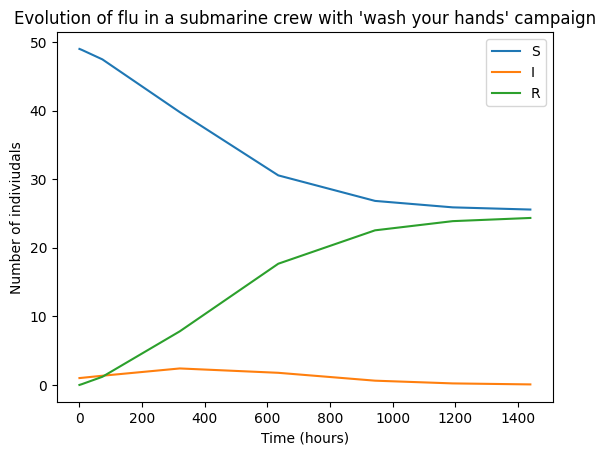

   Total infected  Max infected  Time of max infected
0              24             2             320.45464


In [12]:
## Task 2b: Flu spread with "wash your hands" campaign

# Same initial conditions and value of gamma, but reduce beta by a factor of 5.

# Create an array with the initial conditions
y0=np.array([49,1,0]) 

# Use solve_ivp to solve the model with the specified equations and parameter
# values (eqs2), initial conditions (y0), up to time 1600 hours. 
sol = solve_ivp(
    SIR_eqs,
    [0, 1440],
    y0,
    args=(10.0 / (45 * 5 * 24) / 5 , 5.0 / (15 * 24)),
    dense_output=True,
)

# Plot solution
# Plot solution
plt.figure(1)
plt.plot(sol.t, sol.y[0], label="S")
plt.plot(sol.t, sol.y[1], label="I")
plt.plot(sol.t, sol.y[2], label="R")
# Label axis
plt.xlabel("Time (hours)")
plt.ylabel("Number of indiviudals")
# Create a title and a legend
plt.title("Evolution of flu in a submarine crew with 'wash your hands' campaign")
plt.legend()
plt.show()

# your code here
total_infected = sol.y[1][-1] + sol.y[2][-1]
max_infected = np.max(sol.y[1])
max_infected_time = sol.t[np.argmax(sol.y[1])]

# Print the values
results = DataFrame(
    {
        "Total infected": round(total_infected),
        "Max infected": round(max_infected),
        "Time of max infected": [max_infected_time],
    }
)

print(results)


Your answers here:

The handwashing campaign significantly reduced the flu's spread: total infections dropped from 50 to 24, peak infections fell from 28 to 2, and the peak time was delayed to 320 hours, demonstrating the effectiveness of simple behavioral interventions.

## Task 2c: Outbreak or not
[3 marks]

For the number of infected individuals $I$ to increase, the rate of change $\frac{dI}{dt}$ must be positive. From the form of the SIR ODE system, we see that this corresponds to $\beta S  I - \gamma I > 0$. 

Hence initially, at time $t = 0$, the infected group of individuals starts to grow when 
$$\beta S(0)  I(0) - \gamma I(0) >0. $$
In our case, we have $I(0) = 1$ infected individual and $S(0) = 49$ susceptibles, and this inequality becomes  
$$\frac{\beta (49)}{\gamma}>1.$$

Hence, if we think of $\gamma=5/(15*24)$ as fixed, it is reasonable to expect that the disease will not take hold if $\beta < \beta^\star$, where 
$$
\beta^\star = \frac{\gamma}{49} \approx 2.8 \times {10}^{-4}.
$$

This argument is not rigorous, because it is relevant only for short time periods.

By simulating the ODE over 1000 hours using $\gamma=5/(15*24)$ and the same initial conditions as above, and examining the peak infection level for various choices of $\beta$, produce a plot that indicates whether the inequality $\beta < \beta^\star$ can be used to predict whether an outbreak will occur.
Write a brief summary (one or two sentences) giving your conclusion.

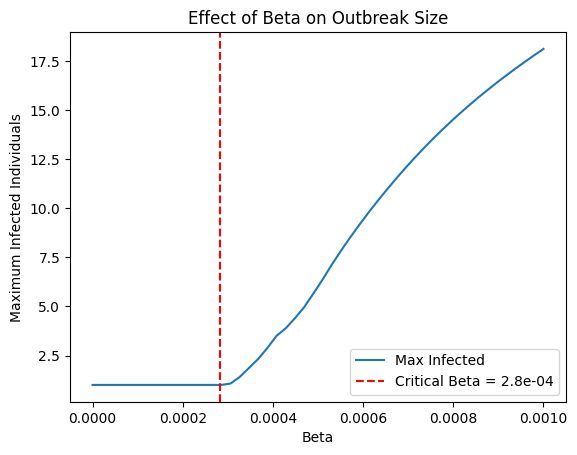

In [13]:
## Task 2c: Outbreak or not

# In our system, S(0)=49 and gamma=5/(15*24). 
# To visualize the impact of varying beta, we will solve the system for several
# values of beta above and below beta* and plot the maximum number of inefected individuals


N=50 # choose number of values of beta that you want to test
betas=np.linspace(0,0.001,N) # create an array with N values equally spread from 0 to 0.001
maxI=np.zeros([N]) # create an empty vector of length N to store the max number of infected

# Create an array with the initial conditions
y0=np.array([49,1,0])


# Create a loop for i, where i will take N integer values 
# beta is different at each iteration.
for i in np.arange(0,N):
    
    # Use solve_ivp to solve the model with the specified equations and different parameter
    # values, initial conditions (y0) and with time up to 1000 hours. 
    
    # Your code here to find the maximum number of people infected for each beta value.
    sol = solve_ivp(
        SIR_eqs,
        [0, 1000],
        y0,
        args=(betas[i], 5.0 / (15 * 24)),
        dense_output=True,
    )

    # Find the maximum number of infected individuals
    maxI[i] = np.max(sol.y[1])
    
# Plot results showing the beta* value and results for other values of beta 
beta_star = 5.0 / (15 * 24) / 49

plt.figure()
plt.plot(betas, maxI, label="Max Infected")
plt.axvline(x=beta_star, color="red", linestyle="--", label=f"Critical Beta = {beta_star:.1e}")
plt.xlabel("Beta")
plt.ylabel("Maximum Infected Individuals")
plt.title("Effect of Beta on Outbreak Size")
plt.legend()
plt.show()


As $\beta$ is varied, the maximum number of infected individuals (over the time period 0 to 1000 hours) starts to grow above 1 as $\beta$ increases beyond $\beta^\star$. In particular, we see no growth for $\beta <\beta^\star$.
Overall, the inequality arising from the informal argument leads to a useful prediction.

## Task 2d: Time restricted immunity
[4 marks]

We will now assume that immunity after the disease does not last indefinitely. 
This implies that *recovered* individuals may become *susceptible* again. 
We will suppose that loss of immunity (i.e., moving from category R to S) 
happens at a rate that is proportional to the number of recovered individuals. 
Let $\mu$ denote the relevant rate constant.

The new SIR model is then given by the following equations:

\begin{align*}
\frac{dS}{dt} &=& - \beta  SI + \mu R\\
\frac{dI}{dt} &=& \beta S  I - \gamma  I\\
\frac{dR}{dt} &=& \gamma I - \mu R.\\
\end{align*}

Note that $\mu$ is a nonnegative parameter such that that $\mu^{-1}$ gives the typical amount of time it takes to lose immunity.



Suppose that the typical time to lose immunity is 30 days.
So $\mu = 1/(30*24)$. Solve the ODE for $\gamma =0.008$, $\beta=0.0003$ and the same initial conditons as above,
and plot the evolution of the three categories over 300 days. 

In [14]:
## Task 2d

# We first need to define a function that returns the RHS of the ODEs given time,
# variables and parameter values. 

def SIRim_eqs(t, y, beta, gamma, mu):# define function of time, y and model parameters
    S, I, R = y # specify variables
    dydt= np.empty(len(y)) # create empty vector and then fill entries with the corresponding RHS
    dydt[0] = -beta * S * I + mu * R  # dS/dt
    dydt[1] = beta * S * I - gamma * I  # dI/dt
    dydt[2] = gamma * I - mu * R  # dR/dt

    return dydt # the function will return the value of the RHS equations evaluated

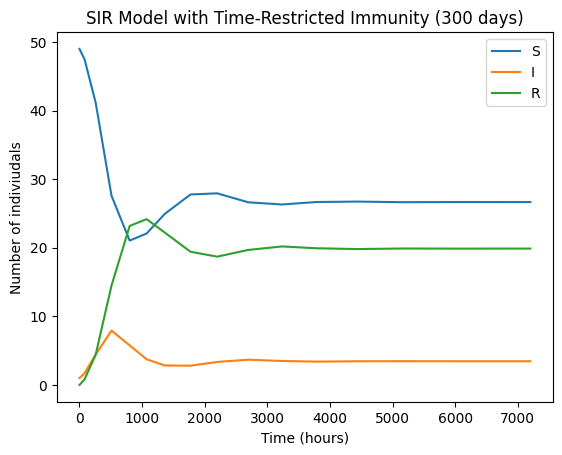

In [15]:
## Task 2d

# Loss of immunity is around 30 days or 30*24 hours, so mu=1/(30*24).

# Create an array with initial conditions
y0=np.array([49,1,0]) 

# Use solve_ivp to solve the model with the specified equations and parameter
# values (eqs1), initial conditions (y0) and with time ranging from 0 to 7200 hours. 
sol = solve_ivp(
    SIRim_eqs,
    [0, 7200],
    y0,
    args=(0.0003, 0.008, 1/(30*24)),
    dense_output=True,
)

# Plot results
# Your code for plotting the results
plt.figure(1)
plt.plot(sol.t, sol.y[0], label="S")
plt.plot(sol.t, sol.y[1], label="I")
plt.plot(sol.t, sol.y[2], label="R")
plt.xlabel("Time (hours)")
plt.ylabel("Number of indiviudals")
plt.title("SIR Model with Time-Restricted Immunity (300 days)")
plt.legend()
plt.show()


## Task 2e: Incorporating vaccination
[4 marks]

Imagine that the on board medical officer launches a vaccination campaign
that starts on day 5 of the outbreak and finishes at the end of day 15. 

We may introduce a category V for individuals who have been successfully vaccinated.
We will assume that at any time during the vaccination phase, any susceptible individual has a 
fixed chance of receiving a successful vaccination.

The new, extended, ODE system becomes 
\begin{align*}
\frac{dS}{dt} &=& - \beta  SI + \mu R -p(t) S\\
\frac{dV}{dt} &=& p(t) S\\
\frac{dI}{dt} &=& \beta S  I - \gamma  I\\
\frac{dR}{dt} &=& \gamma I - \mu R.\\
\end{align*}

Here, $p(t)$ is defined by 

$$p(t)=
\left\{
\begin{array}{ll}
p  & \text{ if }\ 5·24 \leq t \leq 15·24  \\
0 & \text{ otherwise }
\end{array}
\right.$$

where $p$ is a constant that quantifies the effectiveness of the vaccination campaign.
Note that we must multiply the $t$ value by 24 because, throughout this assignment, $t$ is measured in hours, not
days. 


With all other parameters as in Task 2d, solve this ODE model for the case 
$p=0.005$ and plot the evolution of the four categories over 100 days.


In [16]:
## Task 2e

# We need a function p(t) within the function that specifies the RHS of the model ODEs

def SIRVt_eqs(t, y, beta, gamma, mu):
    S, V, I, R = y
    
    dydt= np.empty(len(y))
    
    def p(t):
         ## Your code: Use if and else to specify different values of p(t) 
        if 5 * 24 <= t <= 15 * 24:
            return 0.005
        else:
            return 0
    
    dydt[0] = -beta * S * I + mu * R - p(t) * S  # dS/dt
    dydt[1] = p(t) * S  # dV/dt
    dydt[2] = beta * S * I - gamma * I  # dI/dt
    dydt[3] = gamma * I - mu * R  # dR/dt

    return dydt

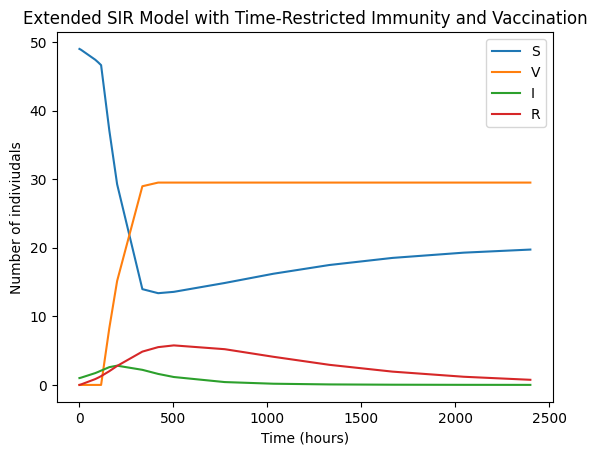

In [17]:
## Task 2e

# Create an array with initial conditions
y0 = np.array([49, 0, 1, 0])

# Use solve_ivp to solve the model with the specified equations and parameters
# beta=0.0003, gamma=0.008,mu=1./(30*24)
#  initial conditions (y0) and with time ranging from 0 to 2400 hours.
sol = solve_ivp(
    SIRVt_eqs,
    [0, 100 * 24],
    y0,
    args=(0.0003, 0.008, 1 / (30 * 24)),
    dense_output=True,
)

# Plot results
# Your code here
plt.figure(1)
plt.plot(sol.t, sol.y[0], label="S")
plt.plot(sol.t, sol.y[1], label="V")
plt.plot(sol.t, sol.y[2], label="I")
plt.plot(sol.t, sol.y[3], label="R")
plt.xlabel("Time (hours)")
plt.ylabel("Number of indiviudals")
plt.title("Extended SIR Model with Time-Restricted Immunity and Vaccination")
plt.legend()
plt.show()

## Task 2f
[4 marks]

All the models in this assignment have the property that, for any initial condition, the sum of the solution components is constant for all time. This makes sense, because the total population is not changing---individuals are moving between compartments.

Let's focus on the ODE in Task 5:
\begin{align*}
\frac{dS}{dt} &=& - \beta  SI + \mu R -p(t) S\\
\frac{dV}{dt} &=& p(t) S\\
\frac{dI}{dt} &=& \beta S  I - \gamma  I\\
\frac{dR}{dt} &=& \gamma I - \mu R.\\
\end{align*}

Summing these components we have
$$
\frac{d(S+V+I+R)}{dt} = 0,
$$
which confirms that the sum $S(t) + V(t) + I(t) + R(t)$ remains constant for all time.


Show that Euler's method on this ODE, **for any stepsize $h>0$**, produces
a numerical solution that is guaranteed to **exactly** preserve the sum over the four components at every time point.

 Use the Markdown cell below to give your answer.
[*Note that this task is not asking you to write any Python code. A few sentences involving some mathematics is required.*]



Answer here:

### Explanation for Task 2f

By using Euler's method to solve ODEs like:

$$
\frac{dy}{dt} = f(t, y),
$$

we will using this formula:

$$
y_{n+1} = y_n + h f(t_n, y_n),
$$

where $h$ is the stepsize.

Now, applying Euler's method to each component of task 2e ODEs:

$$
\begin{aligned}
S_{n+1} &= S_n + h \big(- \beta S_n I_n + \mu R_n - p(t_n) S_n\big), \\
V_{n+1} &= V_n + h \big(p(t_n) S_n\big), \\
I_{n+1} &= I_n + h \big(\beta S_n I_n - \gamma I_n\big), \\
R_{n+1} &= R_n + h \big(\gamma I_n - \mu R_n\big).
\end{aligned}
$$

Summing these updates:

$$
\begin{align*}
(S+V+I+R)_{n+1} =& \ (S+V+I+R)_n \\
 &+ h \big((-\beta S_n I_n + \mu R_n - p(t_n) S_n) \\ 
 &+ h(p(t_n) S_n) \\
 &+ h(\beta S_n I_n - \gamma I_n) \\
 &+ h(\gamma I_n - \mu R_n)\big).
\end{align*}
$$

Then we have:

$$\begin{align*}
& \qquad (S+V+I+R)_{n+1} - (S+V+I+R)_n. \\
 &= S_n \big(-hp(t_n)+hp(t_n)\big) \\
 &+ S_nI_n \big(-h\beta+h\beta\big) \\
 &+ R_n \big(h\mu-h\mu\big) \\
 &+ I_n \big(-h\gamma+h\gamma\big) \\
 &=0
\end{align*}
$$

Thus,
$$
(S+V+I+R)_{n+1} = (S+V+I+R)_n.
$$

This shows that Euler's method preserves the total population $S+V+I+R$ exactly at every step, regardless of the stepsize $h>0$.